# PART 5. 정형 데이터 마이닝

## 1. 데이터 분할과 성과분석
### 가. 데이터 분할 
: 데이터 분할은 train, validation, test data로 분할하여 모델 평가에 사용   
전체데이터에서 각각 train(50%), validataion(30%), test(20%)로 분할하며,    
데이터의 갯수가 작으면 validation을 생략하고 training과 test를 6:4 또는 7:3으로 두고 분석을 진행.   

Question 1) credit 데이터셋 분할하기

In [2]:
import pandas as pd
credit_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\credit_final.csv')
credit_df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [5]:
! pip install fast-ml

In [8]:
# train 50%, validation 30%, test 20%
# 임의로 y를 credit.rating로 지정해서 함수를 사용해줌.  

from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(credit_df, target = 'credit.rating',
train_size=0.5, valid_size=0.3, test_size=0.2)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(500, 20)
(500,)
(300, 20)
(300,)
(200, 20)
(200,)


(None, None)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_df, credit_df['credit.rating'], test_size=0.3, random_state=42)

In [13]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(700, 21)
(700,)
(300, 21)
(300,)


(None, None)

### 나. 데이터 분할 
: 성과분석은 데이터마이닝을 통해 train set으로 모델링 한 뒤, 
test set으로 정확도, 특이도 등을 알아보기 위한 과정

**1) confusionMatrix**   
: caret패키지에서 제공하는 confusionMatriox를 활용하면 (R기준)    
정확도, 특이도 등이 손쉽게 정리된 결과를 얻을 수 있음.

Question 2) confusion matrix를 활용한 성과분석

In [28]:
predicted = pd.DataFrame({'a':[1,0,0,1,1,1,0,0,0,1,1,1]})
actual= pd.DataFrame({'b':[1,0,0,1,1,0,1,1,0,1,1,1]})

In [23]:
predicted

,a
0,1
1,0
2,0
3,1
4,1
5,1
6,0
7,0
8,0
9,1


In [24]:
actual

,b
0,1
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,0
9,1


In [25]:
# 분할표 그리기
pd.crosstab(predicted.a, actual.b)

b,0,1
a,,
0,3,2
1,1,6


In [30]:
len(predicted.a[predicted.a==actual.b])/len(actual.b)

0.75

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted.a, actual.b)

array([[3, 2],
       [1, 6]], dtype=int64)

<font color=blue>Q. 분할표와 confusion matrix는 같은 것인가?    
R에서는 정확도 특이도를 얻는 방법으로 소개되어 있는데...

In [112]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score
print(classification_report(predicted.a, actual.b))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.75      0.86      0.80         7

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12



**2) ROC CURVE**    
: 이진 분류 분석 모형을 비교 분석 결과를 가시화할 수 있다는 점에서 유용한 평가 도구.   
ROC 그래프의 가로축은 1-특이도, 세로축은 민감도로 구성되어 이 두 값의 관계로 모형을 평가   
모형의 성과를 평가하는 기준은 ROC 그래프의 밑부분 면적(Area Under the ROC Curve,AUC)이 넓을수록 좋은 모형

Question 3)

In [36]:
import numpy as np
probability=np.random.uniform(0, 1, 100)

In [37]:
probability

array([0.99798581, 0.33094771, 0.28961433, 0.35628105, 0.46192788,
       0.42983551, 0.65173286, 0.32569915, 0.53609139, 0.97061617,
       0.38555634, 0.11337716, 0.93616307, 0.37514046, 0.70717196,
       0.63664268, 0.80447594, 0.6496585 , 0.43844127, 0.18561616,
       0.72387917, 0.6483423 , 0.39365385, 0.38791959, 0.49137924,
       0.44996834, 0.9229431 , 0.97712471, 0.25167731, 0.48726522,
       0.16944443, 0.8699372 , 0.05539143, 0.66304296, 0.66129575,
       0.50565734, 0.21751974, 0.35369927, 0.02270874, 0.85156617,
       0.90348452, 0.45342286, 0.41579149, 0.0917435 , 0.12217906,
       0.34029944, 0.28971588, 0.77492502, 0.79517578, 0.73288389,
       0.31520766, 0.04910755, 0.76699704, 0.57231847, 0.72254452,
       0.79254484, 0.28081517, 0.62198794, 0.41974692, 0.32357122,
       0.1483955 , 0.58803982, 0.04588622, 0.63170772, 0.91042352,
       0.92192003, 0.2327631 , 0.82393323, 0.400838  , 0.7809014 ,
       0.45422855, 0.55176666, 0.3400064 , 0.72601239, 0.85954

In [38]:
from sklearn.preprocessing import Binarizer

In [41]:
transformer = Binarizer(threshold=.5).fit(probability.reshape(1,-1))

In [54]:
labels=transformer.transform(probability.reshape(1,-1))
labels

array([[1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 1., 1.]])

In [55]:
labels=labels.reshape(100)

In [52]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
roc_auc_score(pred, probability)

1.0

<font color=blue> R에서의 prediction 함수를 python으로 찾지 못하겠음. 

## 2. 분류분석   
: 분류분석은 데이터가 어떤 그룹에 속하는지 예측하는데 사용하는 기법.   
: 의사결정나무, 앙상블기법, 인공신경망 등이 있음.    
: ADP 실기에서는 "분류기법들을 활용해 가장 정확도같은 지표가 좋은 기법과 결과를 보고서에 나타내라"는 
형식의 문제가 출제됨. 

credit 데이터셋을 활용해 분석과 성과 분석 결과를 확인.   

In [56]:
import pandas as pd
credit_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\credit_final.csv')
credit_df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [59]:
X_train, X_test, y_train, y_test = train_test_split(credit_df, credit_df['credit.rating'], test_size=0.3, random_state=42)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
541,1,2,48,2,3,3979,4,3,4,3,...,1,3,41,2,2,2,3,2,2,1
440,1,3,21,3,2,2288,1,1,4,1,...,4,2,23,2,2,1,3,1,2,1
482,1,3,24,3,4,3863,1,2,1,3,...,2,4,32,2,3,1,3,1,1,1
422,1,2,16,3,4,1175,1,1,2,3,...,3,3,68,2,3,2,1,1,2,1
778,0,2,18,3,3,1245,1,2,4,4,...,2,3,33,2,2,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,3,12,3,4,1412,1,2,4,1,...,2,1,29,2,2,2,4,1,2,1
270,1,3,6,2,1,1236,3,2,2,3,...,4,2,50,2,1,1,3,1,1,1
860,0,3,48,2,4,3914,4,2,4,1,...,2,1,38,1,2,1,3,1,1,1
435,1,3,7,3,3,846,4,4,3,3,...,4,4,36,2,3,1,3,1,1,1


In [89]:
X_train=X_train.loc[:, 'account.balance': 'foreign.worker']

In [92]:
X_test=X_test.loc[:, 'account.balance': 'foreign.worker']

### **가. 로지스틱 회귀분석**
: 반응변수가 범주형인 경우 적용되는 회귀분석   
새로운 설명변수가 주어질 때 반응변수의 각 범주에 속할 확률이 얼마인지를 추정하여   
추정확률을 기준치에 따라 분류하는 목적으로 활용   

#### 1) GLM

In [61]:
import statsmodels.api as sm

In [91]:
logit_reg_sm=sm.GLM(y_train, X_train, family=sm.families.Binomial())
logit_result=logit_reg_sm.fit()
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          credit.rating   No. Observations:                  700
Model:                            GLM   Df Residuals:                      680
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -329.17
Date:                Sat, 07 Aug 2021   Deviance:                       658.34
Time:                        15:11:29   Pearson chi2:                     691.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
account.balance                    0.7551      0.120      6.304      0.000       0.520       0.990
credit.duration.months            -0.0276      0.010     -2.710      0.007      -0.048      -0.008
previous.credit.payment.status     0.6339      0.178      3.558      0.000       0.285       0.983
credit.purpose                    -0.5285      0.104     -5.080      0.000      -0.732      -0.325
credit.amount                     -0.0001   4.93e-05     -2.655      0.008      -0.000   -3.42e-05
savings                            0.3043      0.094      3.251      0.001       0.121       0.488
employment.duration                0.1370      0.097      1.411      0.158      -0.053       0.327
installment.rate                  -0.3417      0.099     -3.449      0.001      -0.536      -0.148
marital.status                     0.1760      0.095      1.849      0.064      -0.011       0.363
guarantor                         -0.1042      0.321     -0.325      0.745      -0.733       0.524
residence.duration                -0.0493      0.094     -0.525      0.599      -0.233       0.134
current.assets                    -0.2159      0.109     -1.978      0.048      -0.430      -0.002
age                                0.0114      0.010      1.138      0.255      -0.008       0.031
other.credits                     -0.1259      0.236     -0.533      0.594      -0.589       0.337
apartment.type                     0.0854      0.204      0.418      0.676      -0.315       0.486
bank.credits                      -0.0905      0.226     -0.401      0.688      -0.533       0.352
occupation                        -0.0814      0.160     -0.509      0.610      -0.395       0.232
dependents                        -0.1492      0.278     -0.537      0.591      -0.693       0.395
telephone                          0.4002      0.225      1.781      0.075      -0.040       0.841
foreign.worker                     0.7159      0.578      1.239      0.216      -0.417       1.849
==================================================================================================
"""

In [93]:
!pip install mlxtend  

In [94]:
from sklearn.linear_model import LogisticRegression 
model_lg = LogisticRegression()

In [95]:
# stepwise feature selection
import sklearn
from mlxtend.feature_selection import SequentialFeatureSelector
ffs=SequentialFeatureSelector(model_lg, k_features='best', forward=True)

In [96]:
ffs.fit(X_train, y_train, custom_feature_names=X_train.columns)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features='best')

In [97]:
features=list(ffs.k_feature_names_)
features

['account.balance',
 'credit.duration.months',
 'previous.credit.payment.status',
 'credit.purpose',
 'credit.amount',
 'savings',
 'marital.status',
 'residence.duration',
 'age',
 'bank.credits',
 'dependents']

In [98]:
model_lg.fit(X_train[features], y_train)

LogisticRegression()

In [106]:
y_pred_lg=model_lg.predict(X_test[features])

In [115]:
#예측을 통한 정확도 확인

confusion_matrix(y_pred_lg,y_test)

array([[ 35,  20],
       [ 57, 188]], dtype=int64)

In [108]:
print(classification_report(y_pred_lg,y_test))

              precision    recall  f1-score   support

           0       0.38      0.64      0.48        55
           1       0.90      0.77      0.83       245

    accuracy                           0.74       300
   macro avg       0.64      0.70      0.65       300
weighted avg       0.81      0.74      0.77       300



In [116]:
y_score_lg=model_lg.predict_proba(X_test[features])

In [130]:
roc_auc_score(y_test, y_score_lg[:,1])

0.7549644648829431

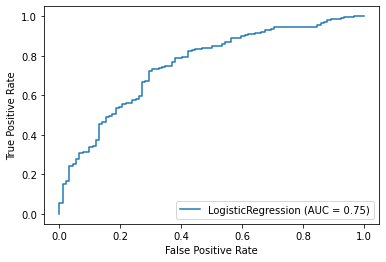

In [134]:
plot_roc_curve(model_lg, X_test[features], y_test)

#### 2) 다항 로지스틱 회귀분석

In [136]:
from sklearn.datasets import load_iris 
iris=load_iris()
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [143]:
y=pd.get_dummies(iris_df['species'])

In [153]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.loc[:,'sepal_length':'petal_width'], y, test_size=0.3, random_state=42)

In [154]:
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [157]:
y_test

,setosa,versicolor,virginica
73,0,1,0
18,1,0,0
118,0,0,1
78,0,1,0
76,0,1,0
31,1,0,0
64,0,1,0
141,0,0,1
68,0,1,0
82,0,1,0


In [156]:
model_multi.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (105, 3) instead.

In [ ]:
y_pred_lg=model_lg.predict(X_test[features])